In [19]:
import pandas as pd

# Load the dataset
dataset_path = 'New Delhi_top_15_places_dataset.csv'
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,City,Place,Review,Rating,Name,Date,Raw_Review,Wheelchair Accessibility,Visual Impairments,Mobility Impairments,Hearing Impairments
0,New Delhi,Chandni Chowk,dusty crowded chaotic great walk ride rickshaw...,3,Anonymous,NaN,"Dusty, crowded and chaotic, it's great to have...",0.0,0.0,0.0,1.0
1,New Delhi,Chandni Chowk,times obviously place real india struggle dail...,2,Anonymous,NaN,"I have been there 4 times, obviously I just ca...",0.0,0.0,0.0,1.0
2,New Delhi,Chandni Chowk,came chandi chowk mend late fathers old automa...,5,Anonymous,NaN,I came to Chandi Chowk to find somewhere to me...,0.0,0.0,0.0,1.0
3,New Delhi,Chandni Chowk,day delhi missed got tuc tuc red fort headed m...,2,Anonymous,NaN,We only had 1 day in Delhi but this was not to...,0.0,0.0,0.0,1.0
4,New Delhi,Chandni Chowk,wish experience old delhi charm mad rush peopl...,4,Anonymous,NaN,BE there if you wish to experience the old Del...,0.0,0.0,0.0,1.0


In [20]:
# Aggregate data by place
place_aggregates = data.groupby('Place').agg({
    'Rating': 'mean',
    'Wheelchair Accessibility': 'mean',
    'Visual Impairments': 'mean',
    'Mobility Impairments': 'mean',
    'Hearing Impairments': 'mean'
}).reset_index()

# Rename columns for clarity
place_aggregates.columns = [
    'Place', 'Average Rating', 'Average Wheelchair Accessibility',
    'Average Visual Impairments', 'Average Mobility Impairments',
    'Average Hearing Impairments'
]

place_aggregates.head()


,Place,Average Rating,Average Wheelchair Accessibility,Average Visual Impairments,Average Mobility Impairments,Average Hearing Impairments
0,Chandni Chowk,3.865058,0.0,0.0,0.0,1.0
1,Connaught Place,4.019746,1.0,1.0,1.0,1.0
2,Delhi Airport Metro Express,4.137372,1.0,1.0,1.0,1.0
3,Friday Mosque (Jama Masjid),3.916066,0.5,0.5,0.5,1.0
4,Gurudwara Bangla Sahib,4.558381,1.0,1.0,1.0,1.0


In [21]:
# Aggregate reviews by concatenating them for each place
aggregated_reviews = data.groupby('Place')['Review'].apply(lambda x: ' '.join(x)).reset_index()

aggregated_reviews.head()


,Place,Review
0,Chandni Chowk,dusty crowded chaotic great walk ride rickshaw...
1,Connaught Place,area good lot eateries available weekends plac...
2,Delhi Airport Metro Express,convenient journey airport city center option ...
3,Friday Mosque (Jama Masjid),review little unfair visited ramadan want insi...
4,Gurudwara Bangla Sahib,delhi way miss visiting place serene magnifice...


In [22]:
# printing the number of words in chandni chowk reviews
chandni_chowk_reviews = data[data['Place'] == 'Chandni Chowk']['Review']
num_words = chandni_chowk_reviews.str.split().apply(len).sum()
print(f"Number of words in Chandni Chowk reviews: {num_words}")

Number of words in Chandni Chowk reviews: 67764


In [23]:
#finding the most frequent words in the reviews of Chandni Chowk
from collections import Counter
import re

# Combine all reviews for Chandni Chowk into a single string
chandni_chowk_reviews_combined = ' '.join(chandni_chowk_reviews)

# Tokenize the text into words
words = re.findall(r'\b\w+\b', chandni_chowk_reviews_combined.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Display the 10 most common words
most_common_words = word_counts.most_common(50)
most_common_words

[('place', 1880),
 ('delhi', 1723),
 ('chowk', 1321),
 ('chandni', 1121),
 ('market', 1051),
 ('old', 996),
 ('food', 958),
 ('visit', 760),
 ('shopping', 696),
 ('crowded', 597),
 ('street', 559),
 ('people', 539),
 ('shops', 521),
 ('rickshaw', 493),
 ('good', 456),
 ('experience', 455),
 ('area', 451),
 ('india', 397),
 ('like', 397),
 ('red', 380),
 ('best', 374),
 ('streets', 372),
 ('fort', 370),
 ('famous', 354),
 ('great', 339),
 ('time', 310),
 ('narrow', 278),
 ('gali', 278),
 ('metro', 270),
 ('want', 263),
 ('indian', 261),
 ('busy', 260),
 ('walk', 247),
 ('shop', 236),
 ('real', 232),
 ('markets', 231),
 ('ride', 230),
 ('really', 228),
 ('buy', 224),
 ('lanes', 221),
 ('wali', 217),
 ('lot', 216),
 ('lots', 214),
 ('things', 207),
 ('places', 202),
 ('clothes', 201),
 ('amazing', 192),
 ('traffic', 186),
 ('u', 183),
 ('visited', 176)]

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)

# Fit and transform the aggregated reviews to create embeddings
tfidf_matrix = tfidf_vectorizer.fit_transform(aggregated_reviews['Review'])

# Convert to array for similarity computation later
tfidf_matrix_array = tfidf_matrix.toarray()

tfidf_matrix_array.shape


(15, 500)

In [25]:
#print tfidf values with their names
tfidf_df = pd.DataFrame(tfidf_matrix_array, columns=tfidf_vectorizer.get_feature_names_out())
#printfirst few 5 rows of the dataframe
tfidf_df.head()

,able,absolutely,accessible,actually,afternoon,ago,agra,air,airport,akshardham,...,winter,wish,wonder,wonderful,work,world,worship,worth,year,years
0,0.005006,0.006747,0.005441,0.007835,0.004634,0.002394,0.000898,0.002829,0.000247,0.000000,...,0.001158,0.005441,0.002829,0.012840,0.006747,0.023940,0.001029,0.036127,0.004135,0.015670
1,0.001343,0.001566,0.010741,0.004252,0.004288,0.004923,0.000000,0.006713,0.005327,0.000000,...,0.001191,0.002461,0.001566,0.006489,0.007608,0.012979,0.000000,0.022153,0.004699,0.016111
2,0.002646,0.003528,0.003087,0.001102,0.000704,0.000661,0.000000,0.019622,0.576560,0.000695,...,0.000235,0.005512,0.000441,0.008158,0.005732,0.029764,0.000000,0.007496,0.000441,0.003087
3,0.006839,0.004209,0.003157,0.008417,0.008401,0.007365,0.007955,0.008417,0.000000,0.000000,...,0.001120,0.004209,0.002630,0.012100,0.005787,0.023674,0.026521,0.079439,0.004209,0.018939
4,0.006958,0.005693,0.007970,0.004554,0.003097,0.001518,0.001043,0.002657,0.003585,0.000399,...,0.001212,0.004807,0.001265,0.019608,0.012903,0.015687,0.066762,0.026946,0.006578,0.006958


In [52]:
from sklearn.metrics.pairwise import cosine_similarity
# Sample user input
user_input = ["mosque historical architecture beautiful peaceful serene religious spiritual"]

# Convert the user input into TF-IDF embedding
user_input_tfidf = tfidf_vectorizer.transform(user_input).toarray()

# Compute the cosine similarity between user input and places
user_similarity_scores = cosine_similarity(user_input_tfidf, tfidf_matrix_array)

# Get the top 5 recommended places based on similarity scores
top_indices = user_similarity_scores.argsort()[0][-10:][::-1]
recommended_places_based_on_input_tfidf = aggregated_reviews.iloc[top_indices]




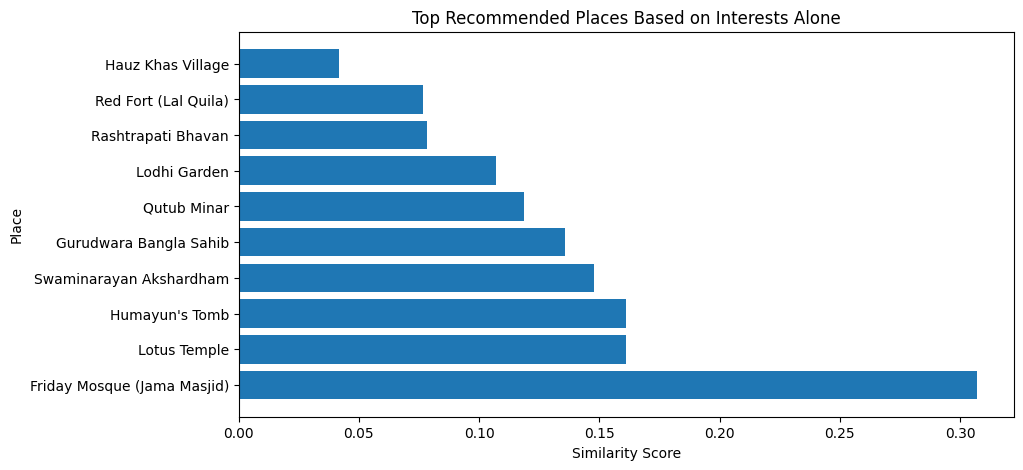

,Place,Review
3,Friday Mosque (Jama Masjid),review little unfair visited ramadan want insi...
10,Lotus Temple,lotus unique architecture usual indian style o...
6,Humayun's Tomb,loved architecture tomb feel beauty ancient st...
14,Swaminarayan Akshardham,beautiful educational visit new delhi rupee be...
4,Gurudwara Bangla Sahib,delhi way miss visiting place serene magnifice...
11,Qutub Minar,unesco world heritage site beautiful maintaine...
9,Lodhi Garden,kept lovely gardens city space air lovely monu...
12,Rashtrapati Bhavan,pc intrest ppl r concerned abt indian history ...
13,Red Fort (Lal Quila),lal quila beautiful historical place share exp...
5,Hauz Khas Village,ruins city siri huge water tank hauz khas plac...


In [53]:
#plot the results with the similarity scores
import matplotlib.pyplot as plt

# Plot the similarity scores
# Plot the similarity scores
plt.figure(figsize=(10, 5))
plt.barh(recommended_places_based_on_input_tfidf['Place'], user_similarity_scores[0][top_indices])
plt.xlabel('Similarity Score')
plt.ylabel('Place')
plt.title('Top Recommended Places Based on Interests Alone')
plt.show()

recommended_places_based_on_input_tfidf

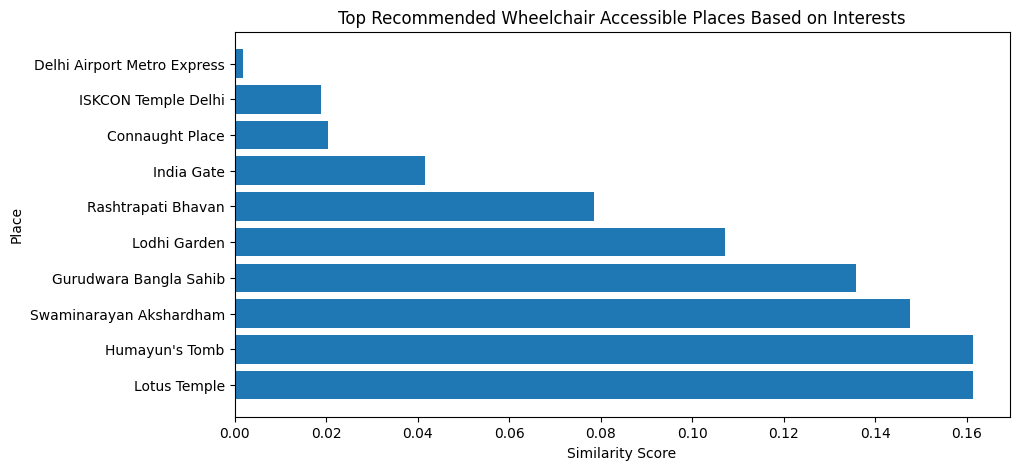

,Place,Review
10,Lotus Temple,lotus unique architecture usual indian style o...
6,Humayun's Tomb,loved architecture tomb feel beauty ancient st...
14,Swaminarayan Akshardham,beautiful educational visit new delhi rupee be...
4,Gurudwara Bangla Sahib,delhi way miss visiting place serene magnifice...
9,Lodhi Garden,kept lovely gardens city space air lovely monu...
12,Rashtrapati Bhavan,pc intrest ppl r concerned abt indian history ...
8,India Gate,time effort car park walk gate surrounding gar...
1,Connaught Place,area good lot eateries available weekends plac...
7,ISKCON Temple Delhi,wonderful place visit new delhi lot activies g...
2,Delhi Airport Metro Express,convenient journey airport city center option ...


In [55]:
# Filter the dataset for places with 'Average Wheelchair Accessibility' score equal to 1
wheelchair_accessible_places = place_aggregates[place_aggregates['Average Wheelchair Accessibility'] == 1]

# Filter the TF-IDF matrix to include only those places
tfidf_matrix_accessible = tfidf_matrix_array[wheelchair_accessible_places.index, :]

# Compute the cosine similarity between user input and wheelchair accessible places
user_similarity_scores_accessible = cosine_similarity(user_input_tfidf, tfidf_matrix_accessible)

# Get the indices of the original dataset (before filtering for accessibility)
accessible_indices = wheelchair_accessible_places.index.values

# Map the top indices back to the original dataset to get the place names
top_accessible_indices = user_similarity_scores_accessible.argsort()[0][-10:][::-1]
recommended_places_based_on_input_accessible = aggregated_reviews.loc[accessible_indices[top_accessible_indices]]

# Plot the similarity scores for wheelchair accessible places
plt.figure(figsize=(10, 5))
plt.barh(recommended_places_based_on_input_accessible['Place'], user_similarity_scores_accessible[0][top_accessible_indices])
plt.xlabel('Similarity Score')
plt.ylabel('Place')
plt.title('Top Recommended Wheelchair Accessible Places Based on Interests')
plt.show()

recommended_places_based_on_input_accessible


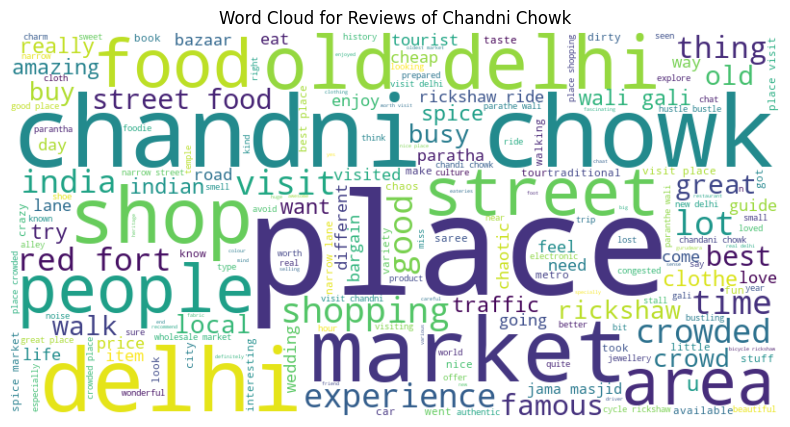

In [29]:
from wordcloud import WordCloud

# Generate a word cloud for the top-recommended place based on interests alone
top_place_reviews = aggregated_reviews.loc[aggregated_reviews['Place'] == recommended_places_based_on_input.iloc[0]['Place'], 'Review'].values[0]
wordcloud = WordCloud(width=800, height=400, background_color ='white', max_words=200).generate(top_place_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud for Reviews of {recommended_places_based_on_input.iloc[0]['Place']}")
plt.show()


In [57]:
from transformers import BertModel, BertTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to generate BERT embeddings
def generate_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
        outputs = model(**inputs)
        # Use the average of the last hidden states as the embedding
        embeddings.append(outputs.last_hidden_state.mean(dim=1).detach().numpy())
    return np.vstack(embeddings)

# Generate embeddings for the aggregated reviews
review_embeddings = generate_bert_embeddings(aggregated_reviews['Review'].tolist())

In [58]:
# Generate embedding for the user input
user_input_embedding = generate_bert_embeddings(["mosque historical architecture beautiful peaceful serene religious spiritual"])

# Compute the cosine similarity
user_similarity_scores = cosine_similarity(user_input_embedding, review_embeddings)


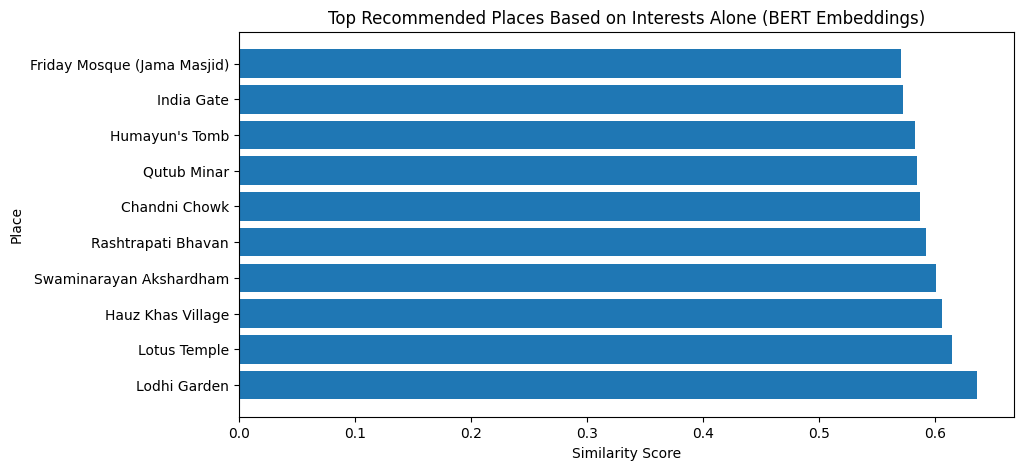

,Place,Review
9,Lodhi Garden,kept lovely gardens city space air lovely monu...
10,Lotus Temple,lotus unique architecture usual indian style o...
5,Hauz Khas Village,ruins city siri huge water tank hauz khas plac...
14,Swaminarayan Akshardham,beautiful educational visit new delhi rupee be...
12,Rashtrapati Bhavan,pc intrest ppl r concerned abt indian history ...
0,Chandni Chowk,dusty crowded chaotic great walk ride rickshaw...
11,Qutub Minar,unesco world heritage site beautiful maintaine...
6,Humayun's Tomb,loved architecture tomb feel beauty ancient st...
8,India Gate,time effort car park walk gate surrounding gar...
3,Friday Mosque (Jama Masjid),review little unfair visited ramadan want insi...


In [59]:
# Get the top 5 recommended places based on similarity scores
top_indices = user_similarity_scores.argsort()[0][-10:][::-1]
recommended_places_based_on_input = aggregated_reviews.iloc[top_indices]

# Plot the similarity scores
plt.figure(figsize=(10, 5))
plt.barh(recommended_places_based_on_input['Place'], user_similarity_scores[0][top_indices])
plt.xlabel('Similarity Score')
plt.ylabel('Place')
plt.title('Top Recommended Places Based on Interests Alone (BERT Embeddings)')
plt.show()

recommended_places_based_on_input

In [71]:
import numpy as np

# Step 2: Load GloVe embeddings
glove_embeddings = {}
with open("glove.840B.300d.txt", 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            vector = np.asarray(values[1:], dtype='float32')
            glove_embeddings[word] = vector
        except ValueError:
            # Skip the line if conversion fails
            continue

# Function to generate embeddings for text
def text_to_embedding(text, embeddings):
    words = text.split()
    embeddings = np.array([embeddings[word] for word in words if word in embeddings])
    if len(embeddings) == 0:
        return np.zeros(100)  # Return a zero vector if none of the words are in the embeddings
    return np.mean(embeddings, axis=0)


In [76]:
# Step 5: User query embedding
user_query = "mosque historical architecture beautiful peaceful serene religious spiritual"
user_embedding = text_to_embedding(user_query, glove_embeddings)

# Step 3, 4: Generate review embeddings
review_embeddings = np.array([text_to_embedding(review, glove_embeddings) for review in aggregated_reviews['Review']])

# Step 6: Compute similarity scores
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity([user_embedding], review_embeddings)[0]

# Step 7: Recommend top 5 places
top_indices = similarity_scores.argsort()[-10:][::-1]
recommended_places = aggregated_reviews.iloc[top_indices]

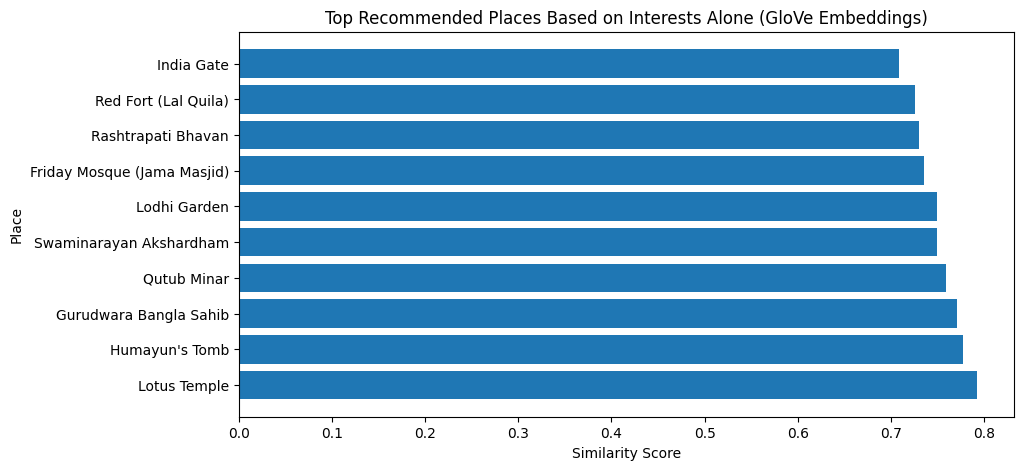

,Place,Review
10,Lotus Temple,lotus unique architecture usual indian style o...
6,Humayun's Tomb,loved architecture tomb feel beauty ancient st...
4,Gurudwara Bangla Sahib,delhi way miss visiting place serene magnifice...
11,Qutub Minar,unesco world heritage site beautiful maintaine...
14,Swaminarayan Akshardham,beautiful educational visit new delhi rupee be...
9,Lodhi Garden,kept lovely gardens city space air lovely monu...
3,Friday Mosque (Jama Masjid),review little unfair visited ramadan want insi...
12,Rashtrapati Bhavan,pc intrest ppl r concerned abt indian history ...
13,Red Fort (Lal Quila),lal quila beautiful historical place share exp...
8,India Gate,time effort car park walk gate surrounding gar...


In [77]:
# Plot the similarity scores in ranking
plt.figure(figsize=(10, 5))
plt.barh(recommended_places['Place'], similarity_scores[top_indices])
plt.xlabel('Similarity Score')
plt.ylabel('Place')
plt.title('Top Recommended Places Based on Interests Alone (GloVe Embeddings)')
plt.show()

recommended_places